# MinMax Plot for Paper

Read 100 points from results/raw/7550039_summary.txt
X range: [0.4827, 0.6123]
Y range: [0.0878, 0.5178]
Score range: [0.7950, 1.0009]
Results from results/raw/7550039_summary.txt:
Number of points: 100
Best score: 1.0009
Average score: 0.8456
Plots saved as:
SVG: results/plot/7550039_summary_plot.svg
PNG: results/plot/7550039_summary_plot.png


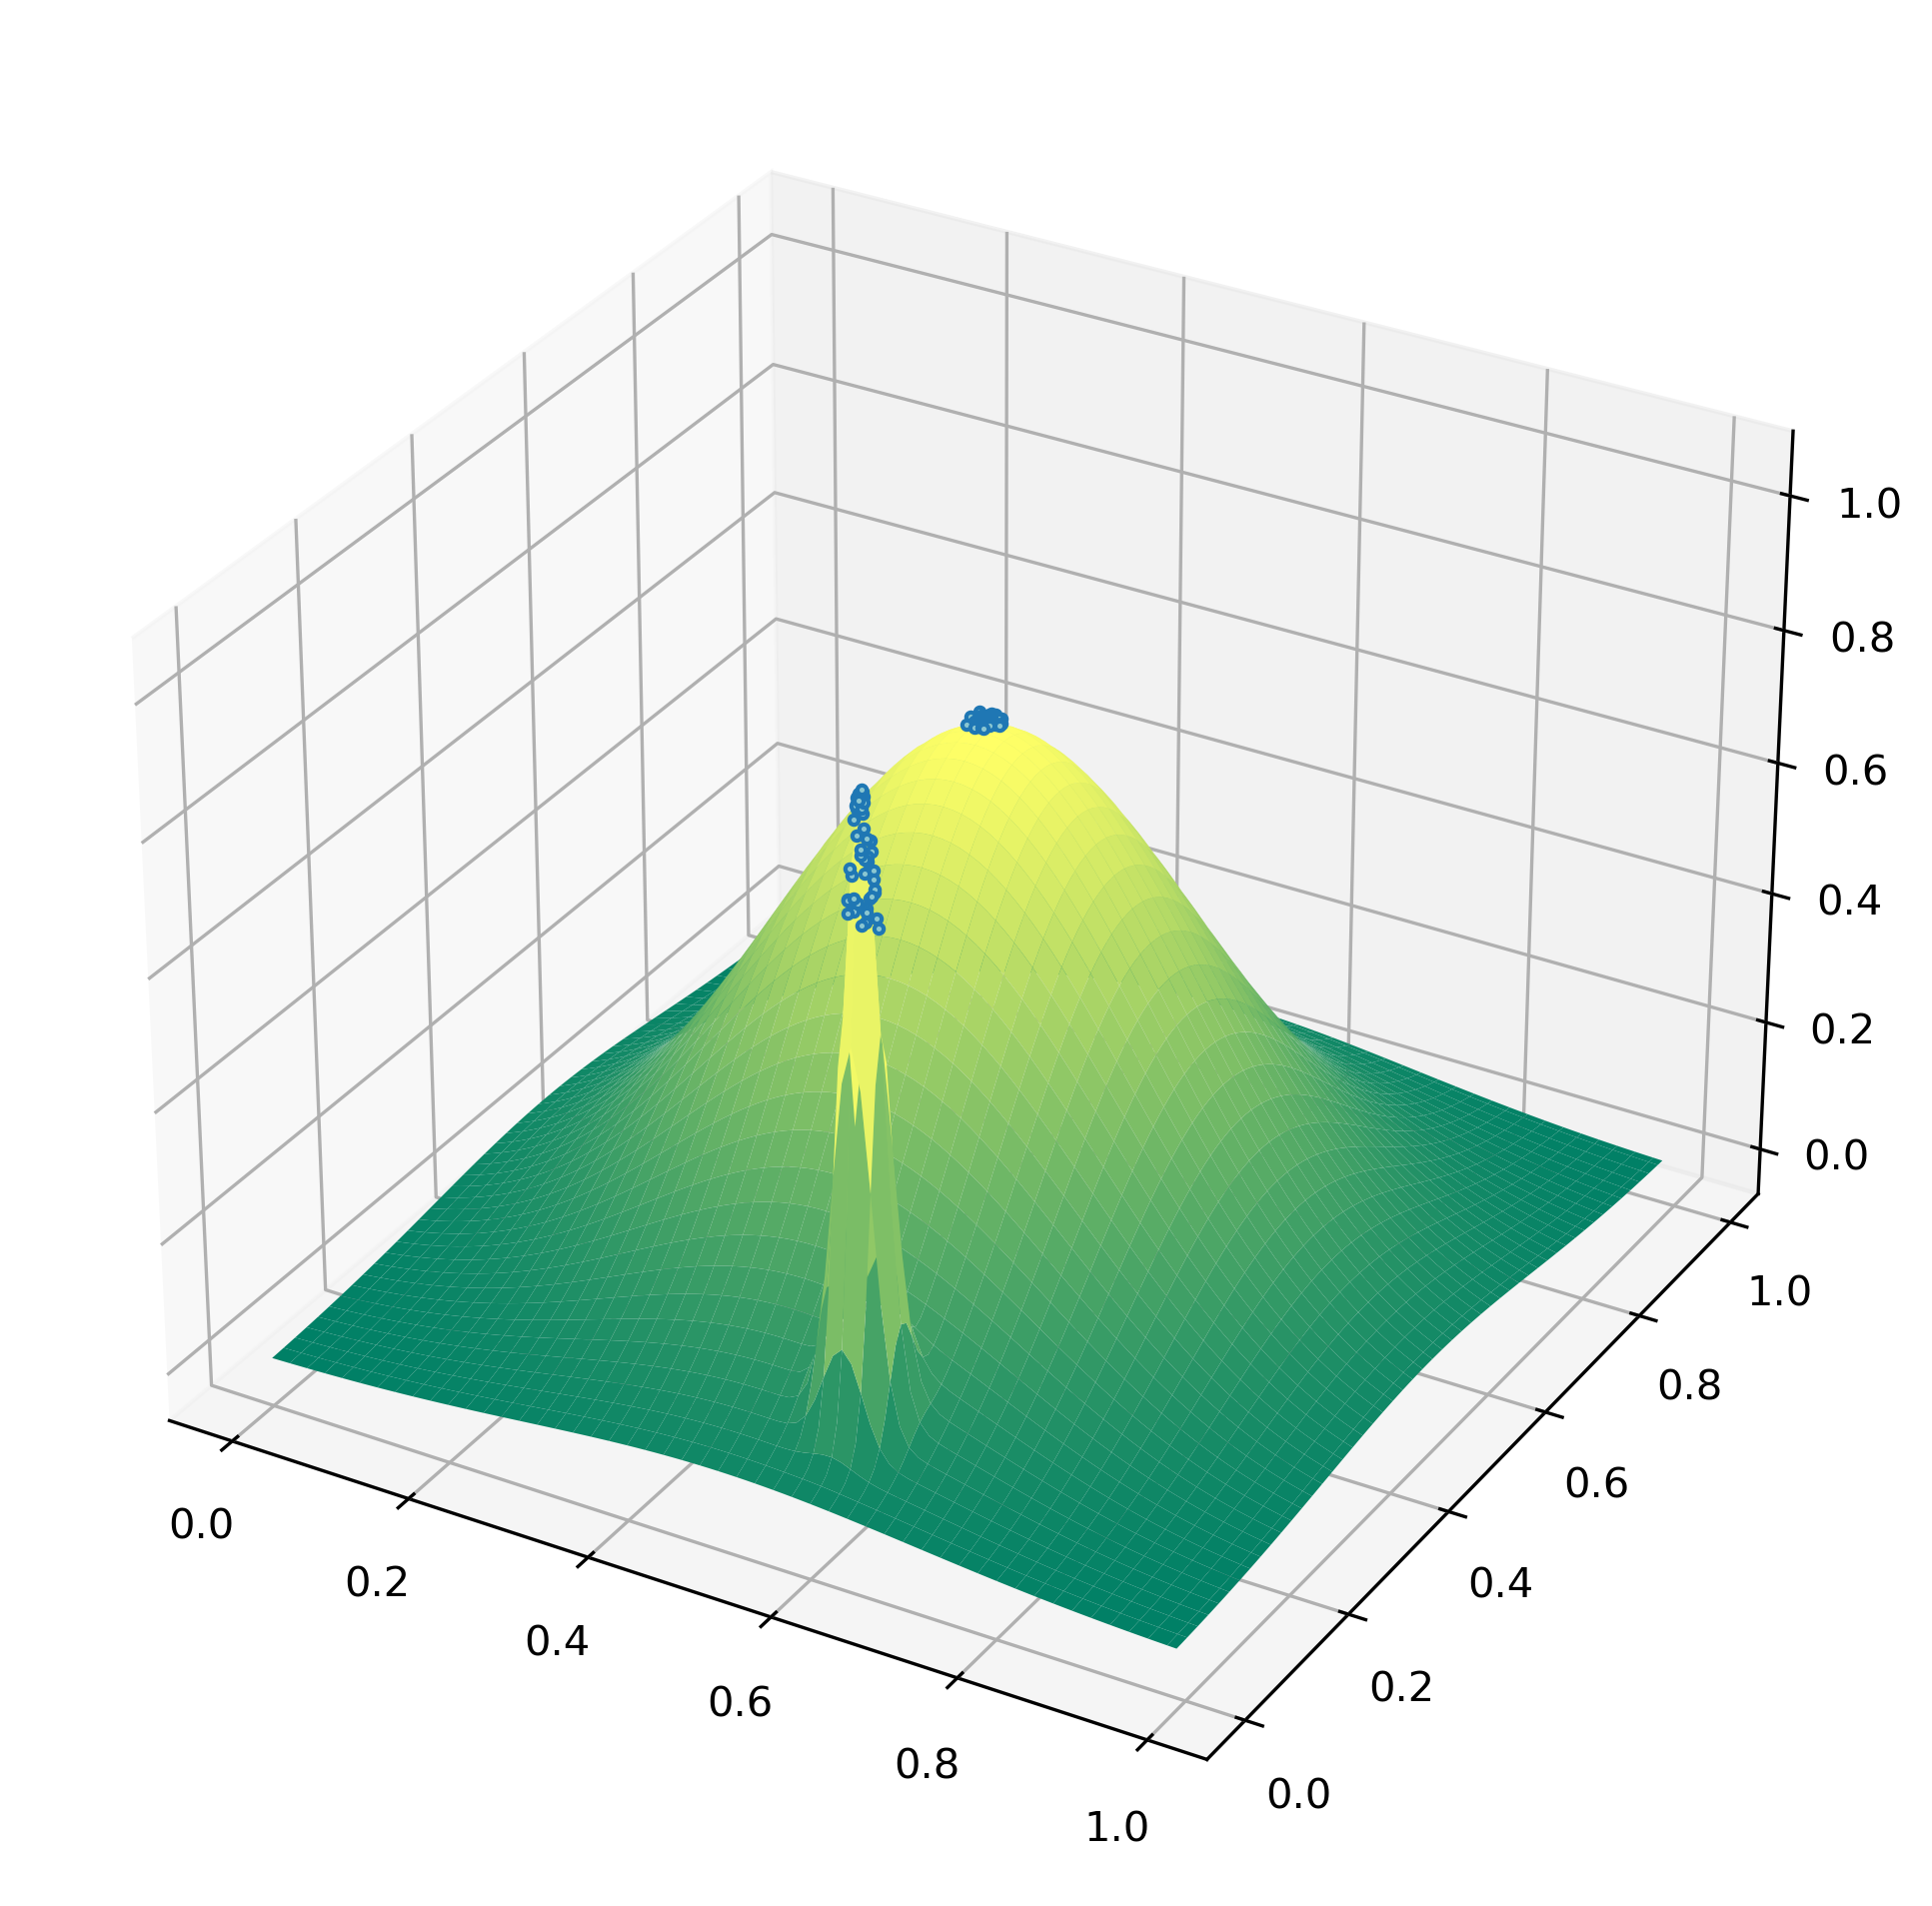

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math
import re
import os

# Configure file path and output directory
input_path = 'raw/7550039_summary.txt'  # Change this to your input file
output_dir = 'plot/'  # Change this to your desired output directory
output_filename_svg = os.path.splitext(os.path.basename(input_path))[0] + '_plot.svg'
output_filename_png = os.path.splitext(os.path.basename(input_path))[0] + '_plot.png'
output_path_svg = os.path.join(output_dir, output_filename_svg)
output_path_png = os.path.join(output_dir, output_filename_png)


def bimodal_func(x,y):
   r1=((x-0.5)**2)+((y-0.5)**2)
   r2=((x-0.6)**2)+((y-0.1)**2)
   result = (0.80*math.exp(-(r1)/(0.3**2))) + (0.88*math.exp(-(r2)/0.03**2))
   return (result)

def read_optimization_results(filename):
    xs, ys, scores = [], [], []
    with open(filename, 'r') as f:
        for line in f:
            # Skip empty lines or lines with userStyle
            if not line.strip() or '<userStyle>' in line:
                continue
                
            # Format 1: Repeat N: Best parameters: [x, y], Best objective value: score
            if line.startswith('Repeat'):
                try:
                    params = re.findall(r'\[(.*?)\]', line)[0].split(',')
                    x = float(params[0])
                    y = float(params[1])
                    score = float(re.findall(r'objective value: ([\d.]+)', line)[0])
                    xs.append(x)
                    ys.append(y)
                    scores.append(score)
                except:
                    continue
                    
            # Format 2: Run N: Best Parameters: {'x': val, 'y': val}, Objective: val
            elif line.startswith('Run'):
                try:
                    # Extract x and y from dictionary-like string
                    params = re.findall(r"'x': ([-\d.]+).*'y': ([-\d.]+)", line)[0]
                    x = float(params[0])
                    y = float(params[1])
                    # Extract objective value
                    score = float(re.findall(r'Objective: ([-\d.]+)', line)[0])
                    xs.append(x)
                    ys.append(y)
                    scores.append(score)
                except:
                    continue
                    
    return xs, ys, scores

def create_plots(input_path, output_path_svg, output_path_png):
    # Create surface plot data
    X = np.arange(0, 1, 0.01)
    Y = np.arange(0, 1, 0.01)
    X, Y = np.meshgrid(X, Y)

    Z = np.empty([100,100])
    c = 0
    for i in Z:
        c2 = 0
        for i2 in i:
            Z[c][c2] = bimodal_func(X[c][c2],Y[c][c2])
            c2 += 1
        c += 1

    # Read optimization results
    xs, ys, zs = read_optimization_results(input_path)

    # Print some statistics
    print(f"Read {len(xs)} points from {input_path}")
    print(f"X range: [{min(xs):.4f}, {max(xs):.4f}]")
    print(f"Y range: [{min(ys):.4f}, {max(ys):.4f}]")
    print(f"Score range: [{min(zs):.4f}, {max(zs):.4f}]")

    # **Removed the first (red-blue) plot**

    # Create only the green plot
    fig = plt.figure(figsize=(12, 8), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Greenish surface
    ax.plot_surface(X, Y, Z, cmap=cm.summer, zorder=-1)

    offset = 0.02  # Slightly larger offset to ensure visibility
    ax.scatter(xs, ys, np.array(zs) + offset, 
               s=5, c='#8ac6d1ff', 
               edgecolors='#1f77b4ff',
               zorder=1000,
               depthshade=False)

    # Save in both formats with high quality
    plt.savefig(fname=output_path_svg, dpi=300, format='svg', bbox_inches='tight')
    plt.savefig(fname=output_path_png, dpi=300, format='png', bbox_inches='tight')
    # plt.show()

    # Print summary statistics
    print(f"Results from {input_path}:")
    print(f"Number of points: {len(xs)}")
    print(f"Best score: {max(zs):.4f}")
    print(f"Average score: {np.mean(zs):.4f}")
    print(f"Plots saved as:")
    print(f"SVG: {output_path_svg}")
    print(f"PNG: {output_path_png}")

# Run the plotting function
if __name__ == "__main__":
   # Make sure output directory exists
   os.makedirs(output_dir, exist_ok=True)
   
   # Create plots
   create_plots(input_path, output_path_svg, output_path_png)
